# In Hospital Mortality Prediction

**Dataset:** In Hospital Mortality Prediction Dataset from MIMIC-III database

**Source:** https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction

**Motivation/Goal:**

The goal of the project is to create a classification model to classify whether a patient will experience in-hospital mortality or not, based on the data obtained from patients admitted to the Intensive Care Unit for Heart Failure. The models focused on are Logistic Regression, Random Forest, and K-Nearest Neighbors. EDA, Feature Selection, and Dimensionality Reduction will be used to manipulate the dataset before modeling. 

Additionally, categorical variables will be used to stratify the data into groups so that we can perform hypothesis testing and test classification model performance over these different groups. The categorical variables to be analyzed will be determined using Random Forest. 

**Dataset Variables:**

group, ID, outcome, age, gendera, BMI, hypertensive, atrialfibrillation, CHD with no MI, diabetes, deficiencyanemias, depression, Hyperlipemia, Renal failure, COPD, heart rate, Systolic blood pressure, Diastolic blood pressure, Respiratory rate, temperature, SP O2, Urine output, hematocrit, RBC, MCH, MCHC, MCV, RDW, Leucocyte, Platelets, Neutrophils, Basophils, Lymphocyte, PT, INR, NT-proBNP, Creatine kinase, Creatinine, Urea nitrogen, glucose, Blood potassium, Blood sodium, Blood calcium, Chloride, Anion gap, Magnesium ion, PH, Bicarbonate, Lactic acid, PCO2, EF



### Libraries

In [1]:
#libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import eli5
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.feature_selection import  SelectKBest,f_classif
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
import shap
from statsmodels.stats.outliers_influence import variance_inflation_factor

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Color Palette

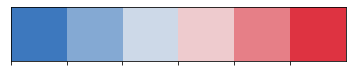

In [2]:
sns.palplot(sns.diverging_palette(250,10, 80, 50, center='light'))

## Data Loading, Preprocessing

In [3]:
df = pd.read_csv("data01.csv")
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [4]:
df.shape

(1177, 51)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [6]:
#convert columns to category
columns_to_category= ['outcome', 'gendera','hypertensive','atrialfibrillation','CHD with no MI','diabetes','deficiencyanemias','depression','Hyperlipemia','Renal failure','COPD']
df[columns_to_category]= df[columns_to_category].astype('category')

In [7]:
#### Renaming columns name
columns = df.columns
new_cols =[]
c1= {}
for col in columns:
    res=col.replace(" ","_")
    c1[col] =res
df.rename(columns=c1, inplace=True)    

In [8]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD_with_no_MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal_failure', 'COPD', 'heart_rate',
       'Systolic_blood_pressure', 'Diastolic_blood_pressure',
       'Respiratory_rate', 'temperature', 'SP_O2', 'Urine_output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine_kinase', 'Creatinine', 'Urea_nitrogen',
       'glucose', 'Blood_potassium', 'Blood_sodium', 'Blood_calcium',
       'Chloride', 'Anion_gap', 'Magnesium_ion', 'PH', 'Bicarbonate',
       'Lactic_acid', 'PCO2', 'EF'],
      dtype='object')

In [9]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD_with_no_MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal_failure                 0
COPD                          0
heart_rate                   13
Systolic_blood_pressure      16
Diastolic_blood_pressure     16
Respiratory_rate             13
temperature                  19
SP_O2                        13
Urine_output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

### Data Cleaning

In [10]:
# We don't need the group and ID in our model
df.drop(['group','ID'],axis=1,inplace=True)

In [11]:
# droping duplicate value
df.drop_duplicates()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD_with_no_MI,diabetes,deficiencyanemias,depression,...,Blood_sodium,Blood_calcium,Chloride,Anion_gap,Magnesium_ion,PH,Bicarbonate,Lactic_acid,PCO2,EF
0,0.0,72,1,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,2,NaN,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,2,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,2,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,2,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.0,62,1,25.516870,1,1,0,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,0.0,78,1,25.822710,0,1,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,0.0,85,2,23.891779,1,1,0,1,1,0,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,0.0,79,2,35.288554,0,0,1,1,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [12]:
# droping columns with 1 unique value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

We have 1 null value in our categorical data. we have to remove it.

In [13]:
# cheking for unique value in outcome
df['outcome'].unique()

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.


[0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]

In [14]:
# droping the null value from outcome variable
df = df.dropna(subset=['outcome'])

In [15]:
df.describe()

,age,BMI,heart_rate,Systolic_blood_pressure,Diastolic_blood_pressure,Respiratory_rate,temperature,SP_O2,Urine_output,hematocrit,...,Blood_sodium,Blood_calcium,Chloride,Anion_gap,Magnesium_ion,PH,Bicarbonate,Lactic_acid,PCO2,EF
count,1176.000000,962.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000,1141.000000,1176.000000,...,1176.000000,1175.000000,1176.000000,1176.000000,1176.000000,885.000000,1176.000000,948.000000,883.000000,1176.000000
mean,74.047619,30.188278,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900,1899.276512,31.910614,...,138.897009,8.501789,102.292048,13.923755,2.120286,7.378532,26.912116,1.853426,45.535382,48.710034
std,13.437241,9.325997,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002,1272.363631,5.203007,...,4.146172,0.571683,5.334562,2.653463,0.251608,0.067320,5.169696,0.983819,12.711271,12.872604
min,19.000000,13.346801,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,65.000000,24.326461,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000,980.000000,28.154375,...,136.666667,8.150000,99.000000,12.250000,1.955556,7.334615,23.452020,1.200000,37.038462,40.000000
50%,77.000000,28.312474,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.795455,...,139.250000,8.500000,102.516667,13.666667,2.092582,7.380000,26.500000,1.600000,43.000000,55.000000
75%,85.000000,33.633509,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500,2500.000000,35.003125,...,141.600000,8.869375,105.571429,15.404167,2.241964,7.430000,29.881250,2.200000,50.585784,55.000000
max,99.000000,104.970366,135.708333,203.000000,107.000000,40.900000,39.132478,100.000000,8820.000000,55.425000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [16]:
# filling null with median
df = df.fillna(df.median(numeric_only=True))

In [17]:
# cheling for null value again
df.isnull().sum()

outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD_with_no_MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal_failure               0
COPD                        0
heart_rate                  0
Systolic_blood_pressure     0
Diastolic_blood_pressure    0
Respiratory_rate            0
temperature                 0
SP_O2                       0
Urine_output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1176
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   outcome                   1176 non-null   category
 1   age                       1176 non-null   int64   
 2   gendera                   1176 non-null   category
 3   BMI                       1176 non-null   float64 
 4   hypertensive              1176 non-null   category
 5   atrialfibrillation        1176 non-null   category
 6   CHD_with_no_MI            1176 non-null   category
 7   diabetes                  1176 non-null   category
 8   deficiencyanemias         1176 non-null   category
 9   depression                1176 non-null   category
 10  Hyperlipemia              1176 non-null   category
 11  Renal_failure             1176 non-null   category
 12  COPD                      1176 non-null   category
 13  heart_rate                1176 non-null   float6

Now we can see here is no null value.

### EDA 

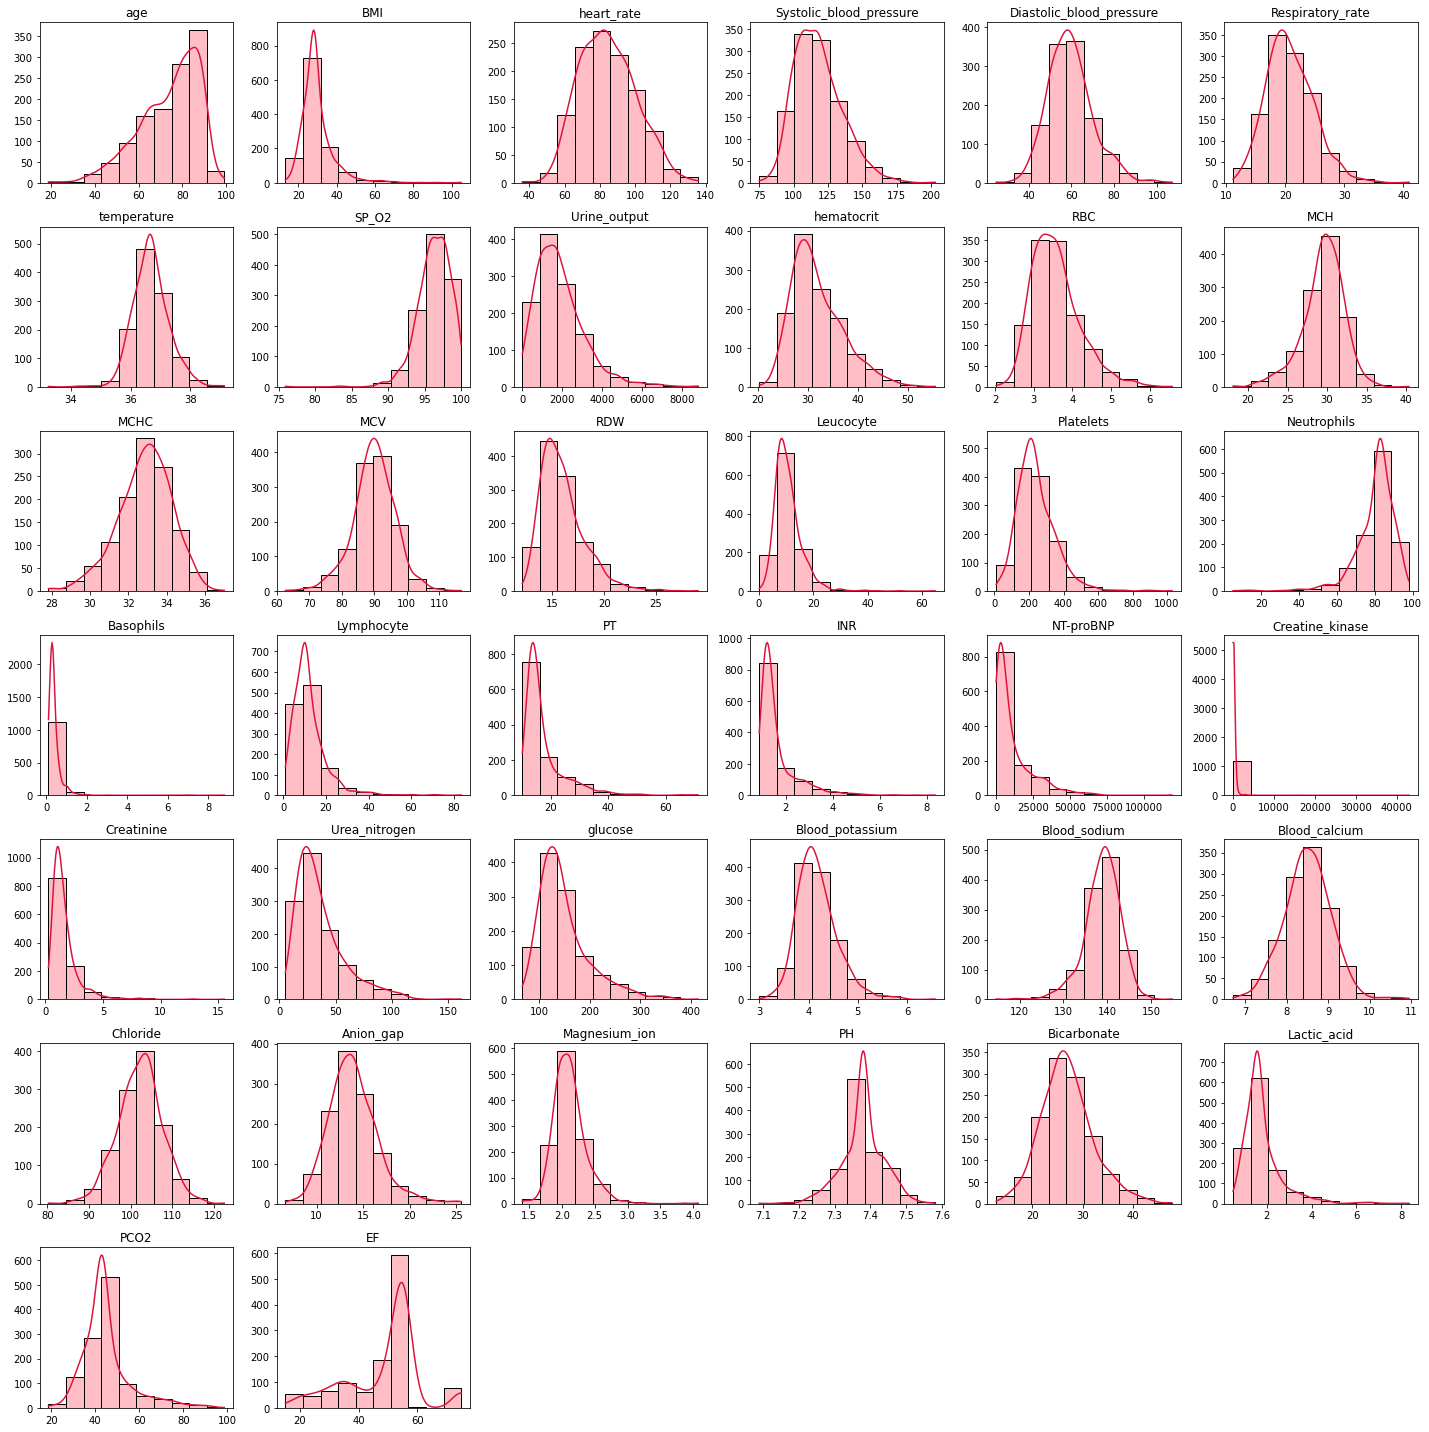

In [19]:
#set up subplot variables for ease of visualization
pal =sns.set_palette(sns.color_palette(['#FF7E8F']))
fig, ax = plt.subplots(7,6,figsize=(20,20))
ax = ax.ravel()
pos = 0
n = df.shape[0]

#plot Hisograms with kde 
for column in df.select_dtypes(exclude="category").columns:
    w = (df[column].max() - df[column].min())/np.sqrt(n)
    sns.histplot(data = df[column], ax=ax[pos], kde=True, bins=10).set_title(column)
    ax[pos].set(xlabel = None, ylabel=None)
    ax[pos].lines[0].set_color('crimson')
    pos+=1


#formatting subplot
plt.tight_layout()
#remove unused subplot axes
for i in range(38,42):
        plt.delaxes(ax[i])

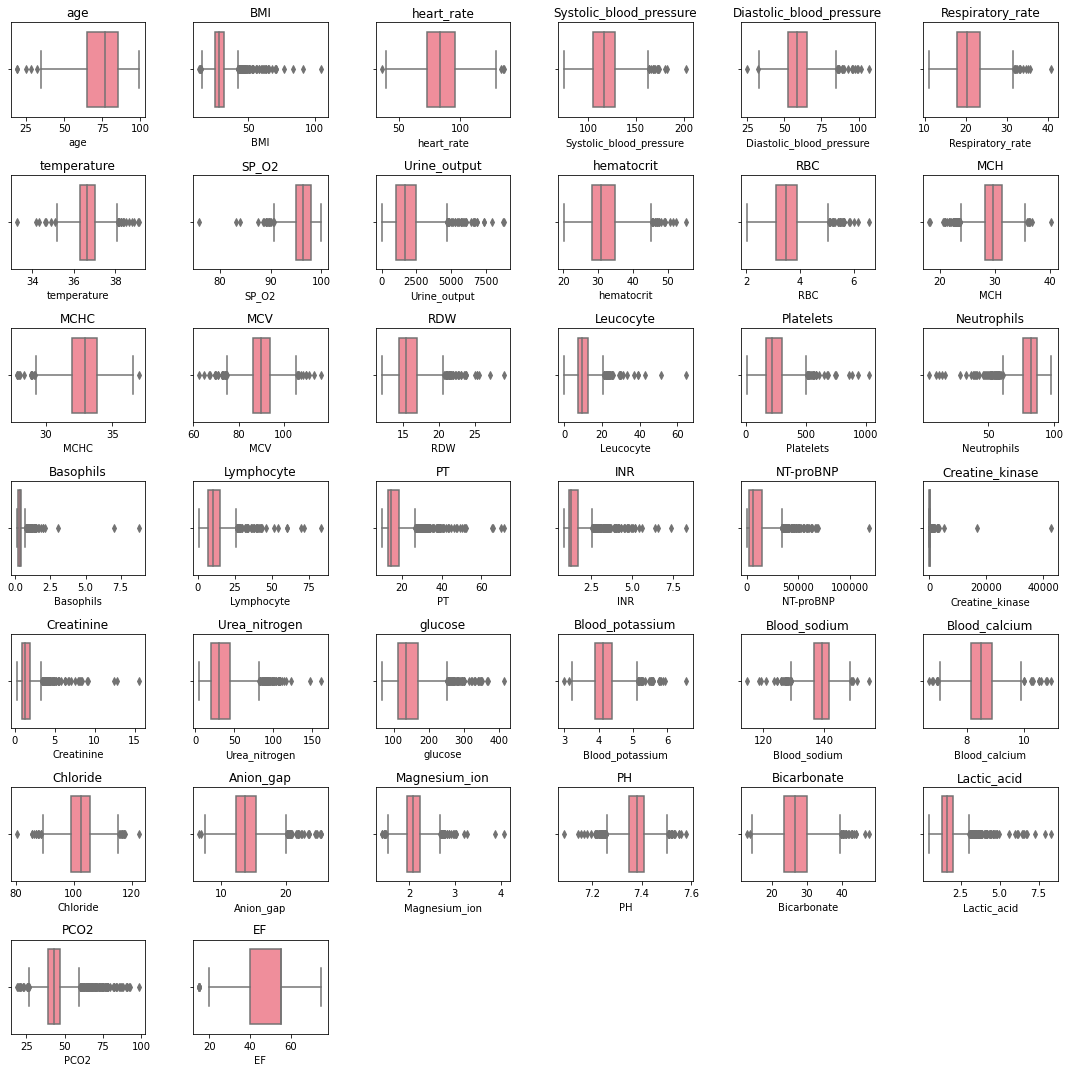

In [20]:
#define color
pal =sns.set_palette(sns.color_palette(['#FF7E8F']))
#set up subplot variables for ease of visualization
fig, ax = plt.subplots(7,6,figsize=(15,15))
ax = ax.ravel()
pos = 0
#plot violin plots with data points outside of the lower and upper bounds marked 
for column in df.columns:
    if (df[column].dtype != "category"):
        sns.boxplot(data = df, x = column, ax=ax[pos],palette=pal)
        #sns.scatterplot(x=outliers(column),y=0,marker='D',color='red',ax=ax[pos],s=10)
        ax[pos].set_title(column)
        pos+=1

#formatting subplot
plt.tight_layout()
#remove unused subplot axes
for i in range(38,42):
        plt.delaxes(ax[i])

In [21]:
df = df[df['age'] >35]
df = df[df['BMI'] < 50]
df = df[df['heart_rate'] < 130]
df = df[df['Systolic_blood_pressure'] < 170]
df = df[df['Diastolic_blood_pressure'] < 95]
df = df[df['Diastolic_blood_pressure'] > 30]
df = df[df['Respiratory_rate'] < 33]
df = df[df['temperature'] > 34]
df = df[df['SP_O2'] > 88]
df = df[df['Urine_output'] < 6000]
df = df[df['hematocrit'] < 50]
df = df[df['RBC'] < 5.8]
df = df[df['MCH'] > 20]
df = df[df['MCH'] < 40]
df = df[df['MCHC'] >29]
df = df[df['MCHC'] <37]
df = df[df['MCV'] > 68]
df = df[df['MCV'] < 111]
df = df[df['RDW'] < 24]
df = df[df['Leucocyte'] < 30]
df = df[df['Platelets'] < 750]
df = df[df['Neutrophils'] > 30]
df = df[df['Basophils'] < 2.2]
df = df[df['Lymphocyte'] < 50]
df = df[df['PT'] < 60]
df = df[df['INR'] < 6]
df = df[df['NT-proBNP'] < 70000]
df = df[df['Creatine_kinase'] < 5000]
df = df[df['Creatinine'] < 9]
df = df[df['Urea_nitrogen'] < 110]
df = df[df['glucose'] < 360]
df = df[df['Blood_potassium'] < 6]
df = df[df['Blood_sodium'] >125]
df = df[df['Blood_sodium'] <150]
df = df[df['Chloride'] <120]
df = df[df['Chloride'] >81]
df = df[df['Anion_gap'] < 23]
df = df[df['Anion_gap'] > 7.5]
df = df[df['Magnesium_ion'] < 3.5]
df = df[df['PH'] > 7.1]
df = df[df['Bicarbonate'] < 45]
df = df[df['Lactic_acid'] < 5.5]
df = df[df['PCO2'] < 95]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1176
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   outcome                   1015 non-null   category
 1   age                       1015 non-null   int64   
 2   gendera                   1015 non-null   category
 3   BMI                       1015 non-null   float64 
 4   hypertensive              1015 non-null   category
 5   atrialfibrillation        1015 non-null   category
 6   CHD_with_no_MI            1015 non-null   category
 7   diabetes                  1015 non-null   category
 8   deficiencyanemias         1015 non-null   category
 9   depression                1015 non-null   category
 10  Hyperlipemia              1015 non-null   category
 11  Renal_failure             1015 non-null   category
 12  COPD                      1015 non-null   category
 13  heart_rate                1015 non-null   float6

### Resampling of data

In [23]:
df['outcome'].value_counts()

0.0    896
1.0    119
Name: outcome, dtype: int64

#### As we can see there are only 159 rows for prediction label '1'. So, to deal with this we are resampling data

In [24]:
from sklearn.utils import resample

# Separate input features and target
X=df.loc[:, df.columns != 'outcome'] #independent features
y = df['outcome'] #dependent features

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

# concatenate our training data back together
train_df = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
outcome_zero = train_df[train_df.outcome==0]
outcome_one = train_df[train_df.outcome==1]

# upsample minority
outcome_one_upsampled = resample(outcome_one,
                          replace=True, # sample with replacement
                          n_samples=len(outcome_zero), # match number in majority class
                          random_state=27) # reproducible results

#defining X for models
# combine majority and upsampled minority
train_df = pd.concat([outcome_zero, outcome_one_upsampled])

#reset index 
train_df = train_df.reset_index(drop = True)

# check new class counts
print(train_df.outcome.value_counts())

# concatenate our testing data back together
test_df = pd.concat([X_test,y_test],axis=1)

0.0    711
1.0    711
Name: outcome, dtype: int64


### Divide into categorical and numerical 

In [25]:
# Categorical dataframe including target variable
cat_df = train_df.select_dtypes(include='category')
num_df = train_df.drop(['gendera','hypertensive','atrialfibrillation','CHD_with_no_MI','diabetes','deficiencyanemias',
                  'depression','Hyperlipemia','Renal_failure','COPD'], axis=1)

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<AxesSubplot:>

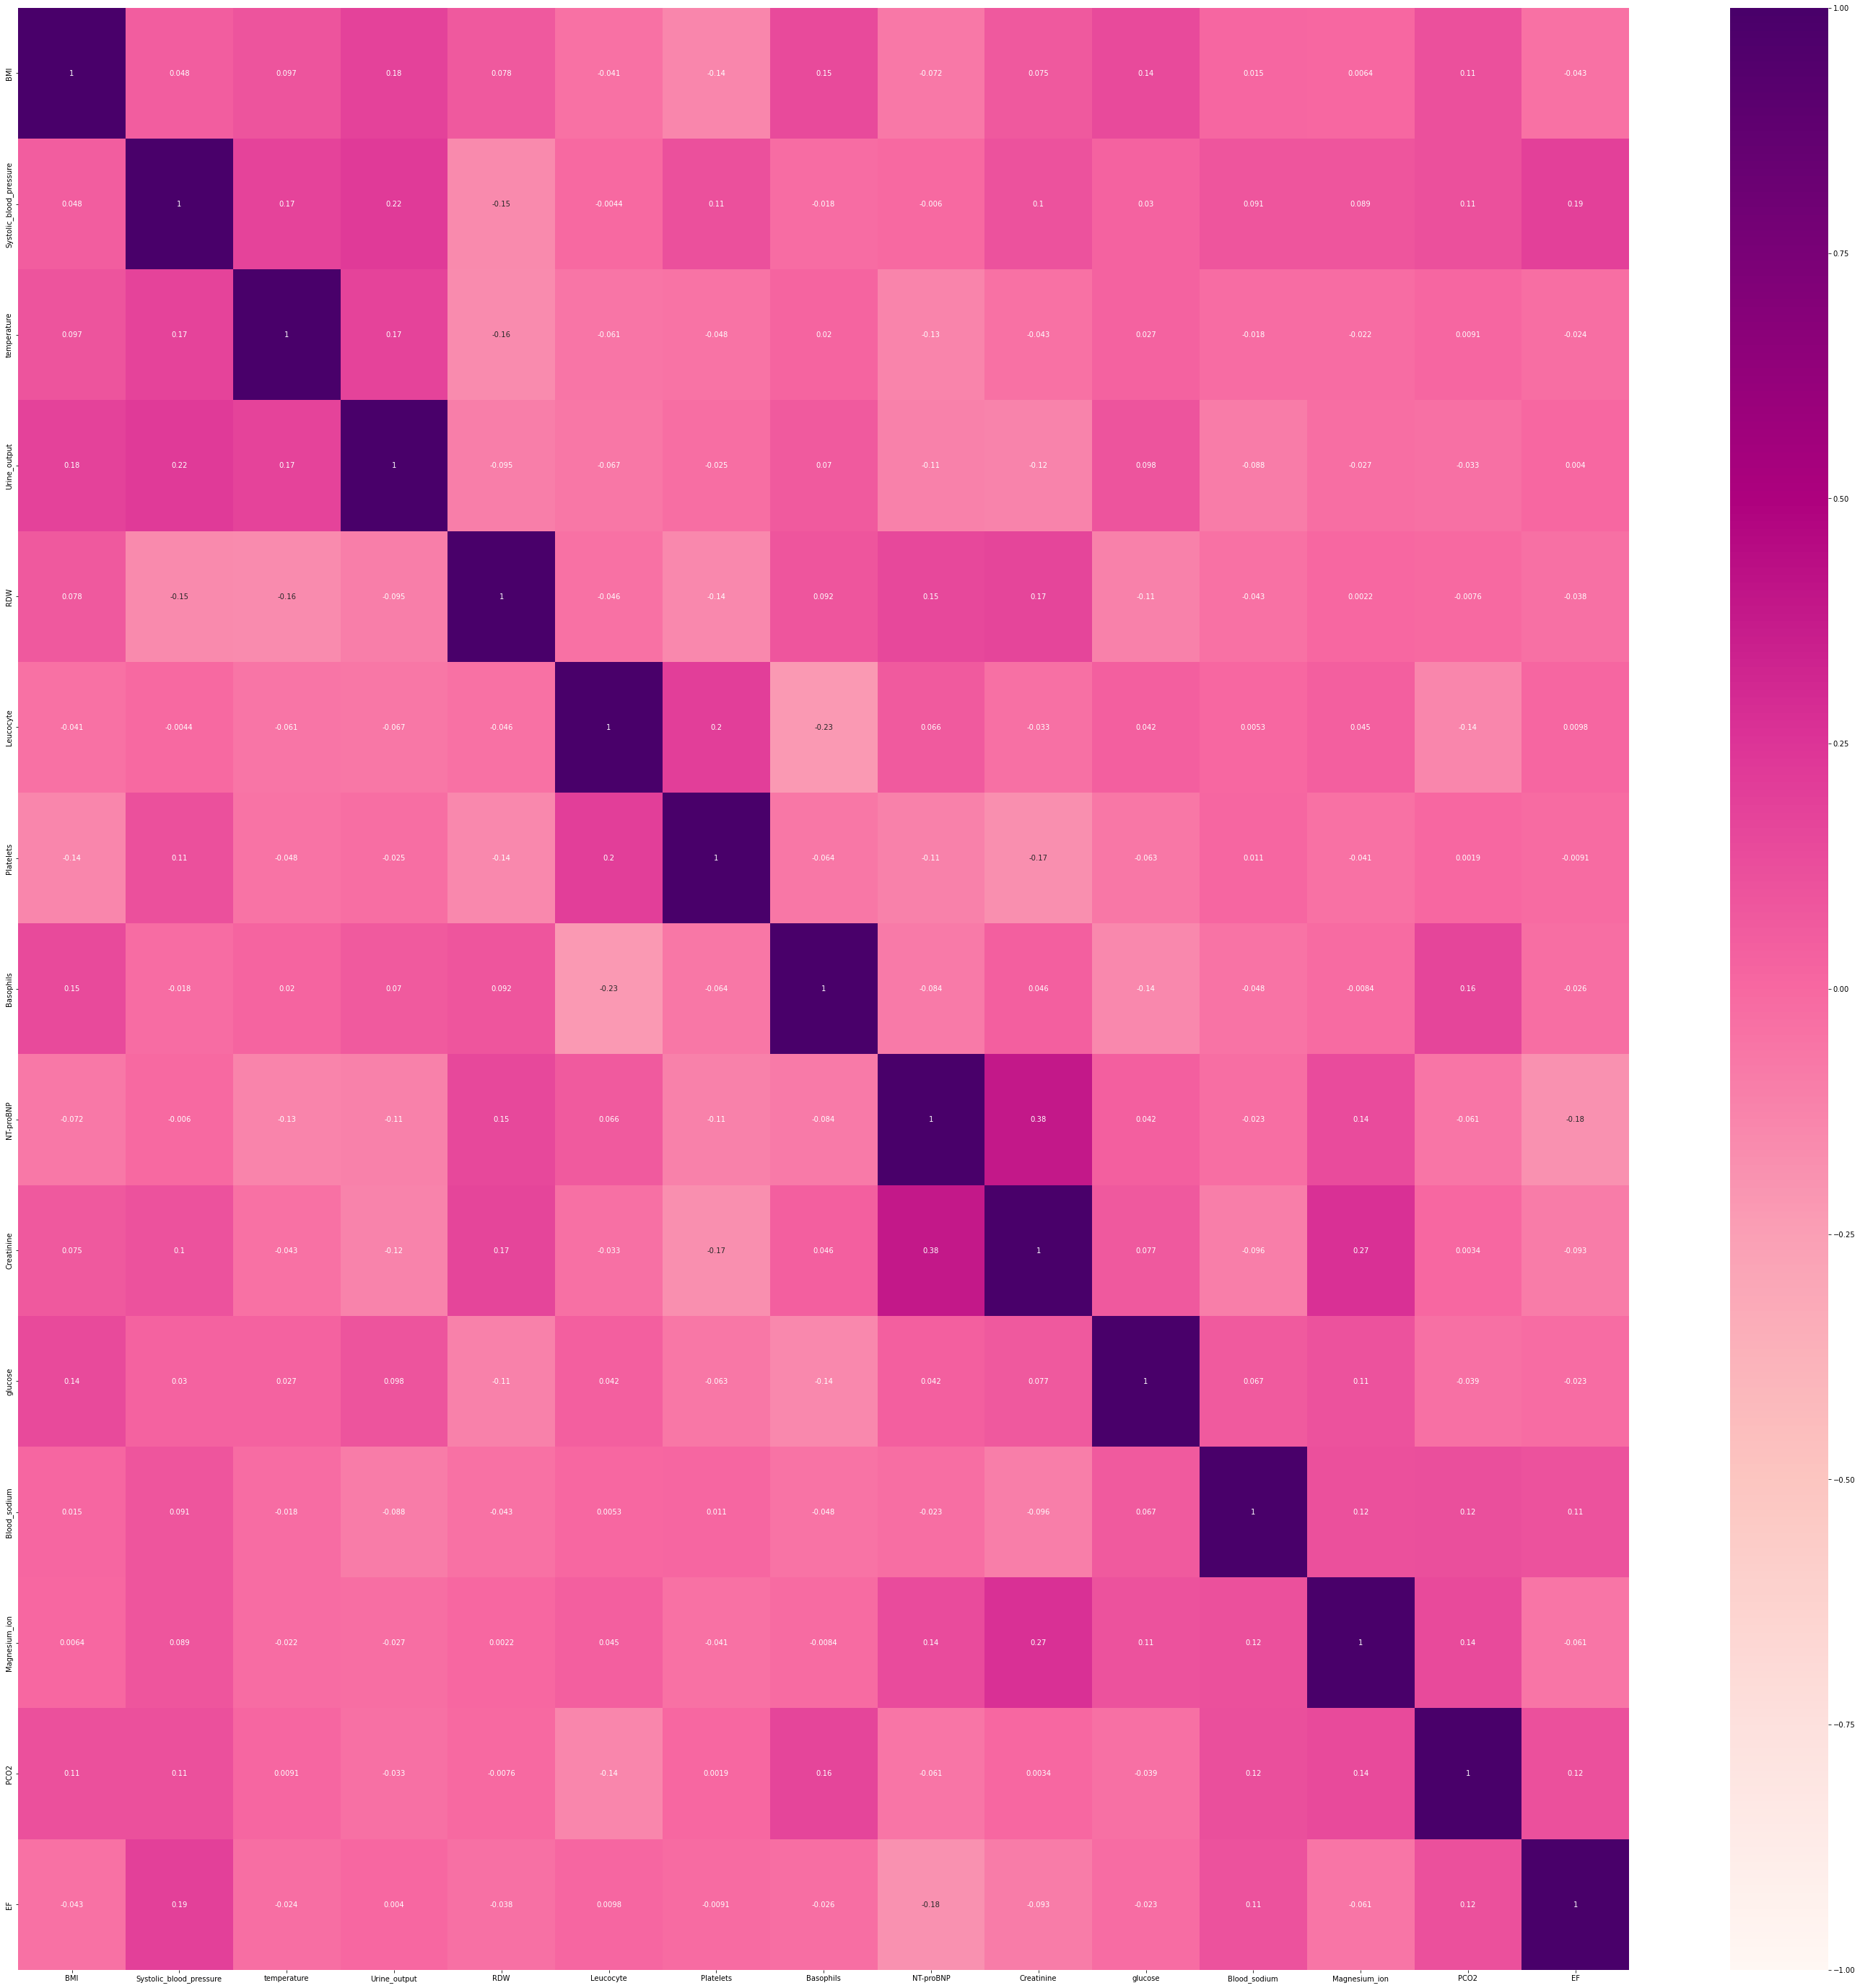

In [171]:
plt.figure(figsize=(50,50))
sns.heatmap(num_df.corr(),annot=True,cmap="RdPu",vmin=-1,vmax=1,center = 0)

### Feature Selection

In [27]:
#StandardScaler continous features 
sc=StandardScaler()
train_df[list(num_df.drop('outcome',axis=1).columns)] = sc.fit_transform(train_df[list(num_df.drop('outcome',axis=1).columns)])
test_df[list(num_df.drop('outcome',axis=1).columns)] = sc.fit_transform(test_df[list(num_df.drop('outcome',axis=1).columns)])


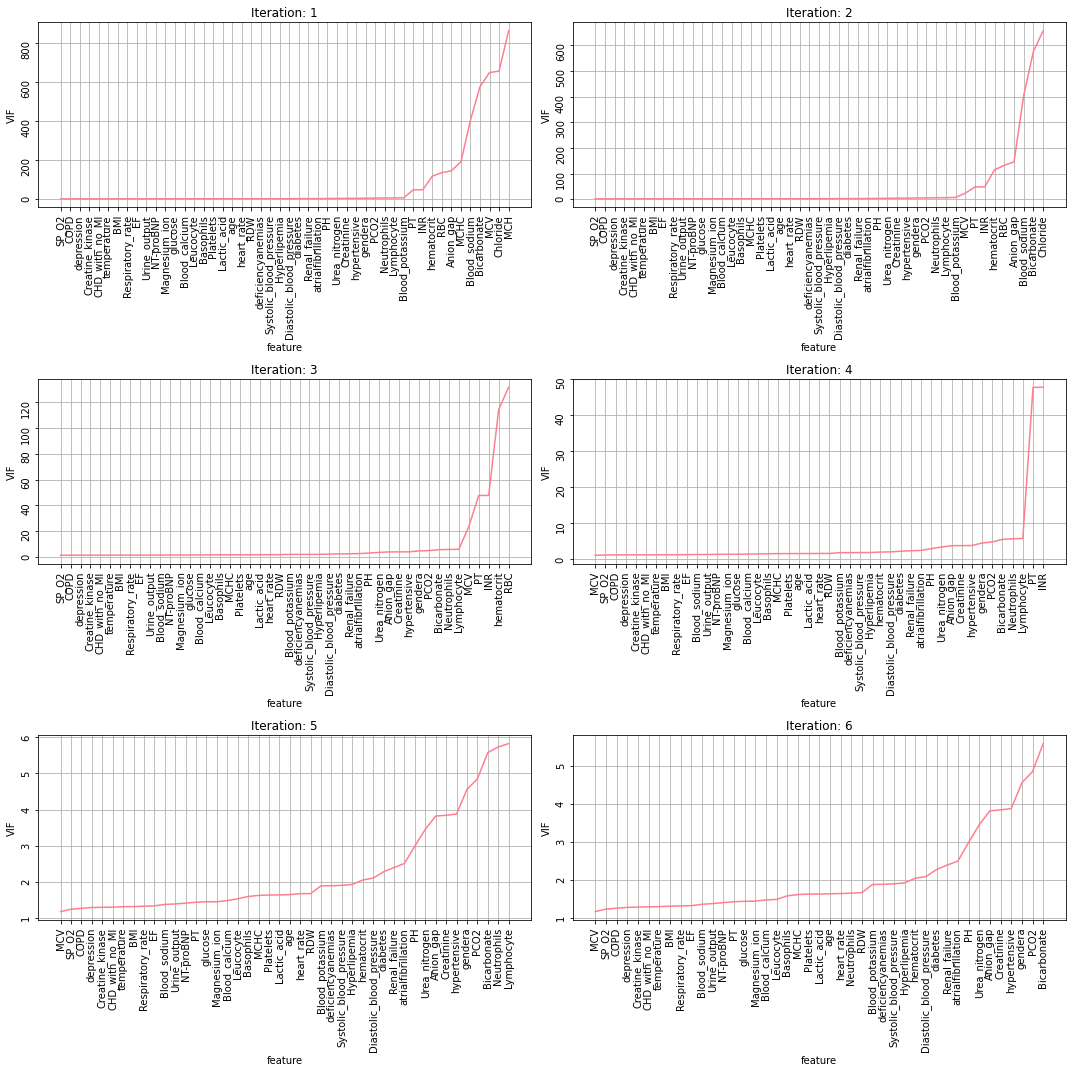

In [28]:
#Define new dataframe for VIF calculations, dropping target variable 
data = train_df.drop(['outcome'],axis=1)

#Define threhold of 5 for VIF, which is the convervative limit for when variables show multicollinearity 
thres = 5

#Counter variables
count = 0
pos = 0

#figures for plotting 
fig, ax = plt.subplots(3,2,figsize=(15,15))
ax = ax.ravel()

#iterative VIF calculations 
while True:
    Cols = range(data.shape[1])
    
    vif = pd.DataFrame([variance_inflation_factor(data.values,i) for i in Cols],columns=['VIF'])
    vif['feature'] = data.columns
    
    if vif['VIF'].max() < thres:
        break
    else:
        Cols = np.delete(Cols, vif['VIF'].idxmax())
        data = data.iloc[:,Cols]
        count+=1
        if count % 1 == 0:
            sns.lineplot(data=vif.sort_values('VIF'),x='feature',y='VIF',ax=ax[pos])
            ax[pos].tick_params(labelrotation=90)
            ax[pos].grid()
            ax[pos].set_title('Iteration: %i' % count)
            pos+=1
            
plt.tight_layout()

In [29]:
# Resultant features after VIF analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       1422 non-null   float64 
 1   gendera                   1422 non-null   category
 2   BMI                       1422 non-null   float64 
 3   hypertensive              1422 non-null   category
 4   atrialfibrillation        1422 non-null   category
 5   CHD_with_no_MI            1422 non-null   category
 6   diabetes                  1422 non-null   category
 7   deficiencyanemias         1422 non-null   category
 8   depression                1422 non-null   category
 9   Hyperlipemia              1422 non-null   category
 10  Renal_failure             1422 non-null   category
 11  COPD                      1422 non-null   category
 12  heart_rate                1422 non-null   float64 
 13  Systolic_blood_pressure   1422 non-null   float6

In [30]:
catlist=list(data.select_dtypes(include='category').columns)
catlist.append('outcome')
numlist=list(data.select_dtypes(exclude='category').columns)
numlist.append('outcome')

# Define categorical and continous dataframes based on VIF results 
cat_df = train_df[catlist]
num_df = train_df[numlist]

In [31]:
cat_df['outcome'].value_counts()

0.0    711
1.0    711
Name: outcome, dtype: int64

In [32]:
# #Feature Selection using Lasso
x = num_df.loc[:, num_df.columns != 'outcome']
y = num_df['outcome']


#StandardScaler
#sc=StandardScaler()
#sc.fit(x)
#x=sc.transform(x)


#Train test split in 80:20 ratio
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



lasso_model = linear_model.Lasso(alpha=0.01,
                               positive=True,
                               fit_intercept=False, 
                               max_iter=1000,
                               tol=0.0001)
lasso_model.fit(x, y)

coeff  = lasso_model.coef_
df_coeff = pd.DataFrame({'Features':num_df.columns[1:], 'scores': coeff})


selected_features = (list(df_coeff[df_coeff['scores'] > 0]['Features']))


print("Feature Selection using Lasso")
print(df_coeff.sort_values(by='scores',ascending=False))
# eli5.show_weights(lasso_model, top=-1, feature_names = num_df.columns[1:].tolist())

Feature Selection using Lasso
                    Features    scores
2    Systolic_blood_pressure  0.119059
13                 Platelets  0.082613
21                   glucose  0.069173
11                       RDW  0.056718
12                 Leucocyte  0.049238
15                 Basophils  0.043986
0                        BMI  0.039739
26             Magnesium_ion  0.034246
5                temperature  0.033872
30                        EF  0.026098
31                   outcome  0.021230
7               Urine_output  0.013454
17                 NT-proBNP  0.011882
23              Blood_sodium  0.011139
29                      PCO2  0.005333
19                Creatinine  0.003469
10                       MCV  0.000000
3   Diastolic_blood_pressure  0.000000
28               Lactic_acid  0.000000
27                        PH  0.000000
4           Respiratory_rate  0.000000
25                 Anion_gap  0.000000
24             Blood_calcium  0.000000
6                      SP_O2  0.00

In [33]:
#feature selection using Ridge

x = num_df.loc[:, num_df.columns != 'outcome'].values #independent features
y = num_df['outcome'].values #dependent features


validation_size=0.20 #split size: 80:20
seed=42 

#StandardScaler
#sc=StandardScaler()
#sc.fit(x)
#x=sc.transform(x)

#Train test split in 80:20 ratio
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=validation_size,random_state=seed)

'''
alpha=1.0 #0.1 learning rate
ridge =Ridge(alpha=alpha)


y_pred_ridge = ridge.fit(x,y).predict(test_df.drop('outcome',axis=1).values)
r2_score_ridge=r2_score(test_df['outcome'].values,y_pred_ridge)

print("r^2 on test data: %f " % r2_score_ridge)
predictors=num_df.columns.values[1:]


coef=pd.Series(ridge.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficient')
'''

'\nalpha=1.0 #0.1 learning rate\nridge =Ridge(alpha=alpha)\n\n\ny_pred_ridge = ridge.fit(x,y).predict(test_df.drop(\'outcome\',axis=1).values)\nr2_score_ridge=r2_score(test_df[\'outcome\'].values,y_pred_ridge)\n\nprint("r^2 on test data: %f " % r2_score_ridge)\npredictors=num_df.columns.values[1:]\n\n\ncoef=pd.Series(ridge.coef_,predictors).sort_values()\ncoef.plot(kind=\'bar\',title=\'Modal Coefficient\')\n'

In [34]:

# Feature selection using SelectKBest algorithm

x=num_df.loc[:, num_df.columns != 'outcome'].values
y = num_df['outcome'].values
z=num_df.iloc[:,0:num_df.shape[1]-1]



selector=SelectKBest(f_classif,k='all')

X_new=selector.fit_transform(x,y)
names=z.columns.values[selector.get_support()]

 
scores=selector.scores_[selector.get_support()]

#combining the columns name and scores
name_scores=list(zip(names,scores))

#creating a dataframe
ns_df=pd.DataFrame(data=name_scores,columns=['Feat_names','F_scores'])

#sort the dataframe for better visualization
ns_df_sorted=ns_df.sort_values(['F_scores','Feat_names'],ascending=[False,True])
print(ns_df_sorted)


                  Feat_names    F_scores
2                 heart_rate  122.196888
13                 Leucocyte  105.360705
21             Urea_nitrogen   76.176976
26                 Anion_gap   65.606751
5           Respiratory_rate   62.855745
15               Neutrophils   62.691909
8               Urine_output   62.356475
12                       RDW   36.560411
25             Blood_calcium   35.847276
23           Blood_potassium   29.053627
11                       MCV   28.847766
28                        PH   26.525539
29               Lactic_acid   26.153972
16                 Basophils   22.666005
14                 Platelets   17.113970
18                 NT-proBNP   17.111629
17                        PT   14.389813
3    Systolic_blood_pressure   12.531242
0                        age   11.536892
27             Magnesium_ion   10.484290
20                Creatinine   10.339946
1                        BMI   10.009072
4   Diastolic_blood_pressure    6.376392
9               

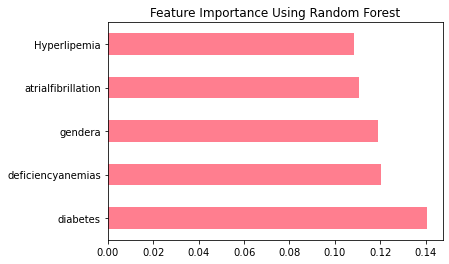

In [35]:
#Feature selection using Random Forest

x=cat_df.loc[:, cat_df.columns != 'outcome']
y = cat_df['outcome']

model = RandomForestClassifier()
model.fit(x,y)

# print(model.feature_importances_) #use inbuilt class feature_importances of random based classifiers

#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance Using Random Forest")
plt.show()


In [36]:
#selected features
features_random_forest = list(feat_importances.index)
print("Selected Categorical Features")
print(features_random_forest)
print('\n')

print("Selected Numerical Features")
print(selected_features)

# update cat and num dataframes
cat_df = cat_df[features_random_forest]
cat_df['outcome'] = train_df['outcome']
num_df = num_df[selected_features]
num_df['outcome'] = train_df['outcome']

Selected Categorical Features
['gendera', 'hypertensive', 'atrialfibrillation', 'CHD_with_no_MI', 'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal_failure', 'COPD']


Selected Numerical Features
['BMI', 'Systolic_blood_pressure', 'temperature', 'Urine_output', 'RDW', 'Leucocyte', 'Platelets', 'Basophils', 'NT-proBNP', 'Creatinine', 'glucose', 'Blood_sodium', 'Magnesium_ion', 'PCO2', 'EF', 'outcome']


In [37]:
feature = features_random_forest + ['outcome']

In [38]:
#reduce dimensions of test_df
all_features = features_random_forest + selected_features
test_df = test_df[all_features]
test_cat_df = test_df[feature]
test_num_df = test_df[selected_features]

# Below cell needs to be adjusted

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Index(['age', 'BMI', 'heart_rate', 'Systolic_blood_pressure',
       'Diastolic_blood_pressure', 'Respiratory_rate', 'temperature', 'SP_O2',
       'Urine_output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine_kinase', 'Creatinine',
       'Urea_nitrogen', 'glucose', 'Blood_potassium', 'Blood_sodium',
       'Blood_calcium', 'Chloride', 'Anion_gap', 'Magnesium_ion', 'PH',
       'Bicarbonate', 'Lactic_acid', 'PCO2', 'EF'],
      dtype='object')


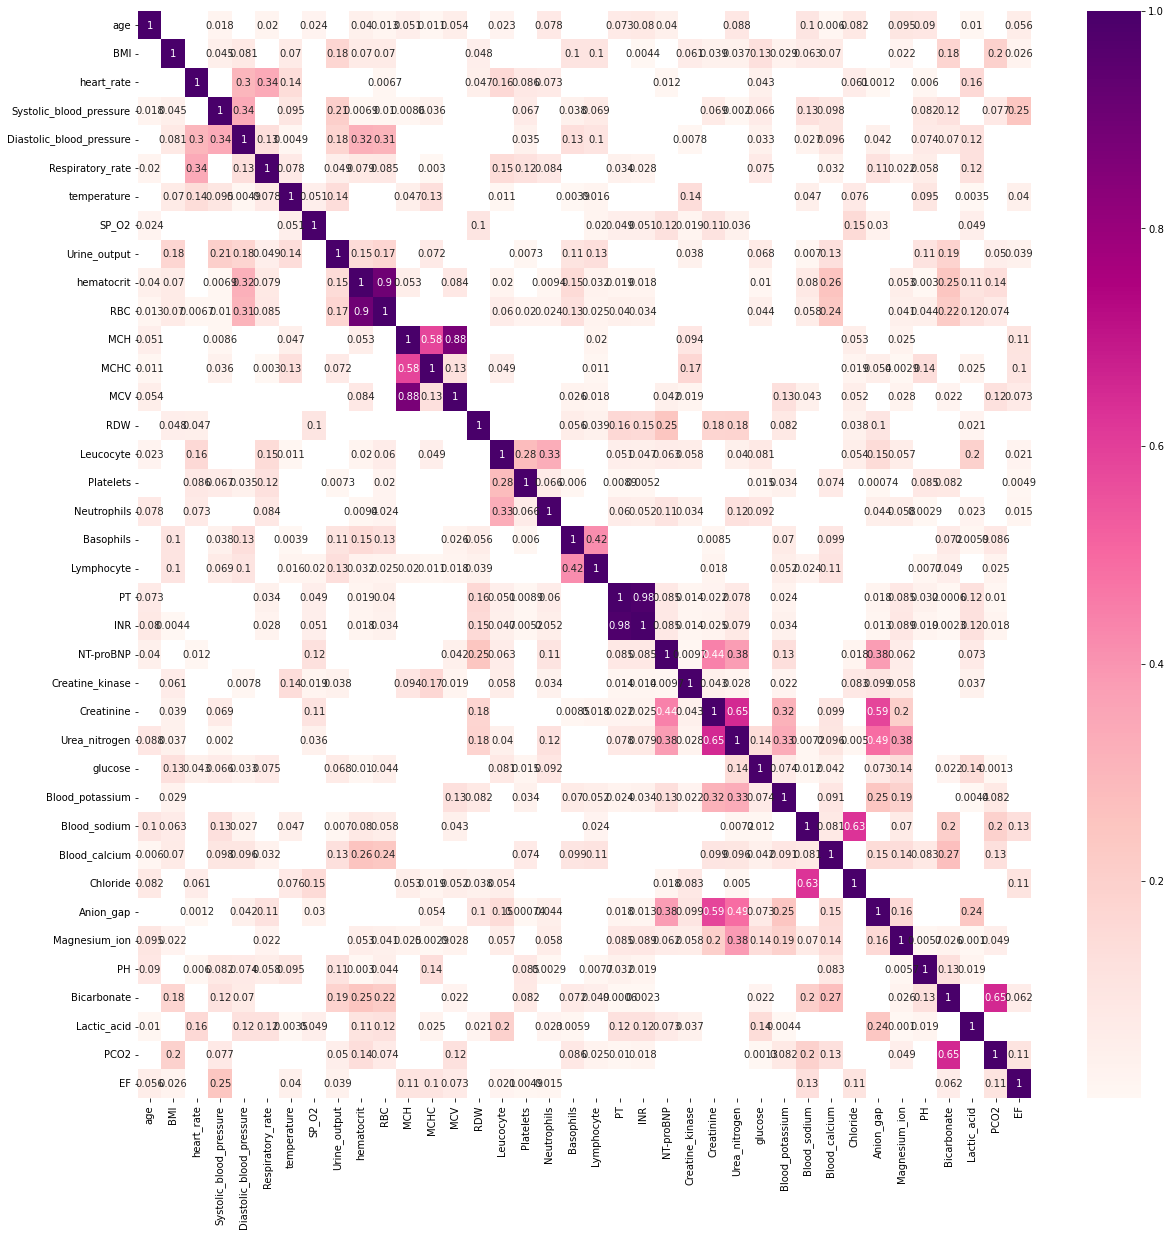

In [172]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdPu" ,mask =  corrmat <0.0)
print(top_corr_features)

In [40]:
# Replace values in gender column with 0 and 1
#df['gendera'] = df['gendera'].apply(lambda x: '0' if x == 1 else '1')

#### Additional EDA

In [41]:
#pairplot after feature selection
#sns.pairplot(num_df, hue='outcome')

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<AxesSubplot:>

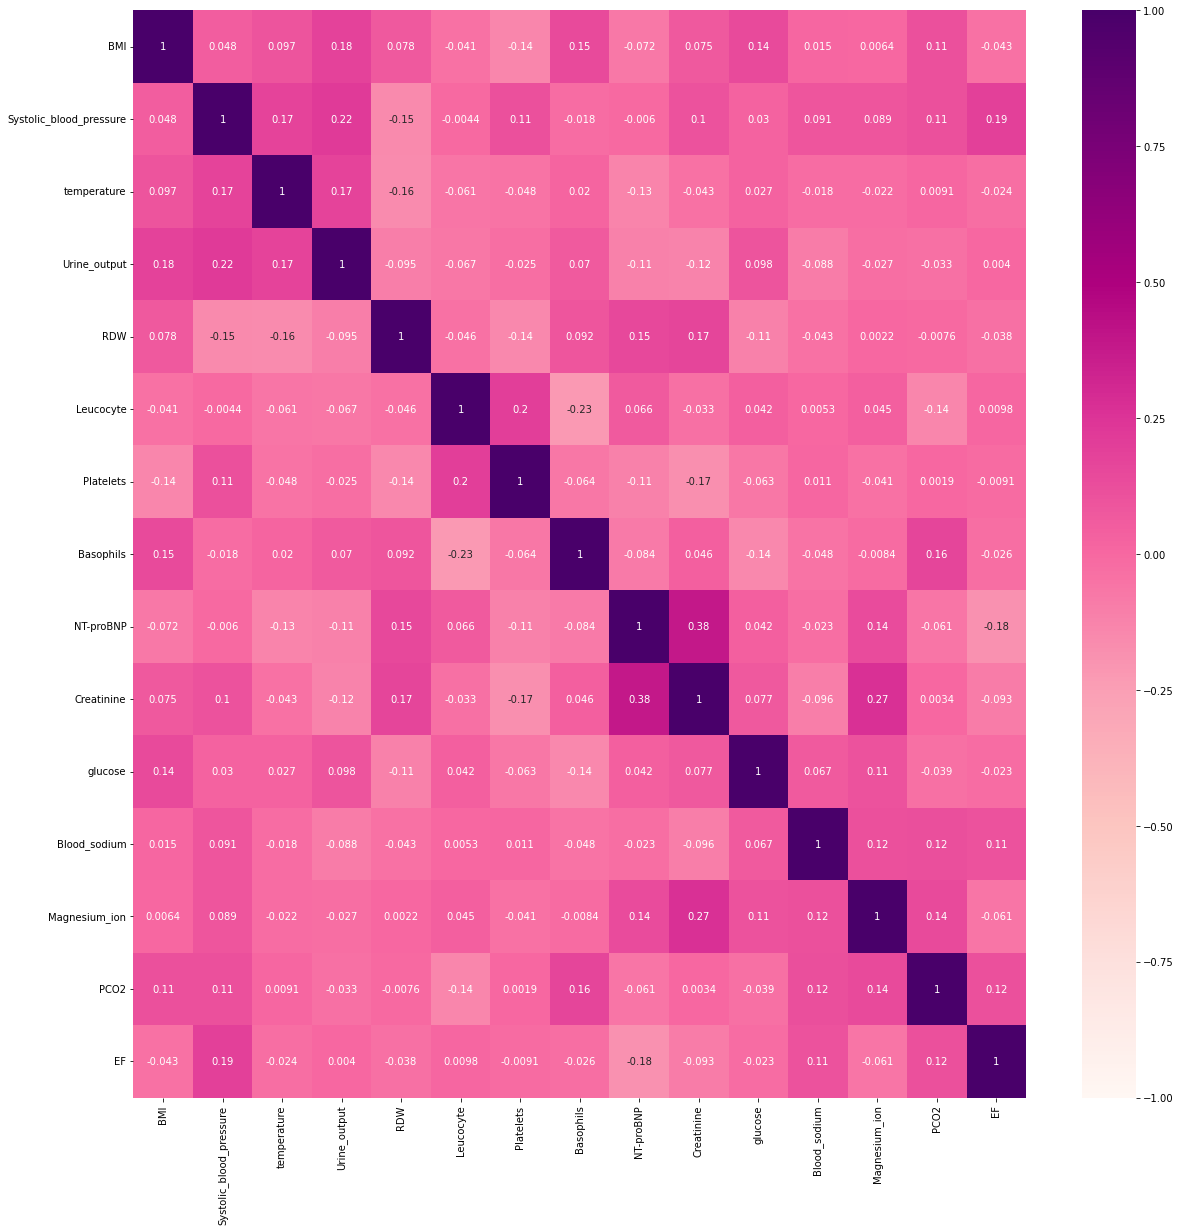

In [173]:
# Heatmap for numerical variable after feature selection
plt.figure(figsize=(20,20))
sns.heatmap(num_df.corr(),annot=True,cmap="RdPu",vmin=-1,vmax=1,center = 0)

### PCA

**Target Variable:** Outcome
* 0 - Alive
* 1 - Death

The first preprocessing step is to divide the dataset into a feature set and corresponding labels

In [43]:
X = num_df.drop(['outcome'], axis=1)
y = num_df['outcome']

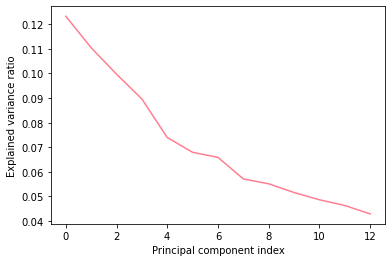

In [92]:
# Checking for how many components should keep
# Build the pipeline
pipe = Pipeline([('reducer', PCA(.90))])

# Fit the pipeline to poke_df and transform the data
pipe.fit(X)
var = pipe['reducer'].explained_variance_ratio_

plt.plot(var)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

From this graph after checking elbow point we can say we should keep 6 components. 

In [93]:
# performing standard scalar normalization to normalize our feature set
#sc = StandardScaler()
#X_sc = sc.fit_transform(X)

In [94]:
# Applying pca
pca = PCA(n_components=6)
X_pca= pca.fit_transform(X)

In [95]:
print(pca.explained_variance_ratio_)

[0.12325393 0.11044283 0.09971865 0.08962272 0.07397488 0.0679595 ]


In [96]:
pca.explained_variance_ratio_.sum()

0.5649725127103744

Let's plot a Scree Plot which will  explained variance.

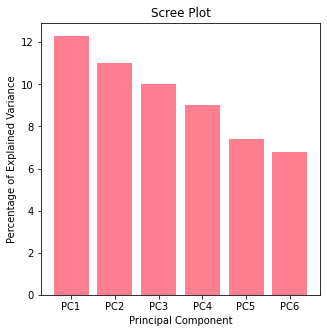

In [97]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt. figure(figsize=(5,5))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [98]:
# This changes the numpy array output back to a DataFrame
X_pc_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6'])

print(X_pc_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.966972  1.782877 -0.952053 -1.405088 -1.621522 -1.099229
1 -2.012096  3.499352  0.531030  2.334477 -1.753157 -0.820873
2 -1.483876  0.197878  0.131047 -0.317830  1.396916  1.403093
3 -0.950295 -1.398700  0.352502  1.029159  0.076503 -0.760649
4 -0.860199  1.807029 -1.555054 -0.279860  1.367071 -0.265036


### Modeling

#### Logistic Regression

In [99]:
# using PCA data
X = num_df.drop('outcome',axis=1).values
y = num_df['outcome'].values

In [100]:
model = LogisticRegression()
model.fit(X,y)
predictions = model.predict(X)

In [101]:
print('Accuracy Score: ', accuracy_score(y, predictions))
print('Confusion Matrix: \n', confusion_matrix(y,predictions))
print('Classification Report: \n', classification_report(y,predictions))

Accuracy Score:  0.6926863572433193
Confusion Matrix: 
 [[486 225]
 [212 499]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.70      0.68      0.69       711
         1.0       0.69      0.70      0.70       711

    accuracy                           0.69      1422
   macro avg       0.69      0.69      0.69      1422
weighted avg       0.69      0.69      0.69      1422



In [54]:
test_num_df.outcome.value_counts()

0.0    185
1.0     18
Name: outcome, dtype: int64

In [55]:
num_df.outcome.value_counts()

0.0    711
1.0    711
Name: outcome, dtype: int64

ValueError: Found input variables with inconsistent numbers of samples: [203, 1422]

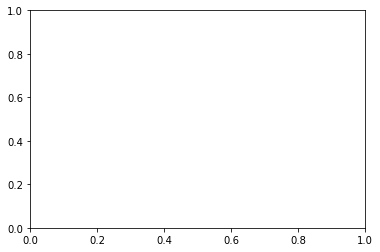

In [56]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False, title = 'Confusion Matrix')

#### Random Forest

# change to decision tree

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [175]:
# #pipeline for random forest
# steps_forest = [('random_forest', RandomForestClassifier())]
# forest_pipeline = Pipeline(steps_forest)

# #params for GridSearchCV
# params = {'random_forest__n_estimators': [25,50,100,150,200,250,300],
#          'random_forest__criterion': ['gini','entropy'],
#          'random_forest__max_features':['sqrt','log2',None]}

# #list(forest_pipeline.get_params().keys())

In [176]:
#pipeline for Decision Tree
step_tree = [('decision_tree', DecisionTreeClassifier())]
tree_pipeline = Pipeline(step_tree)

#params for GridSearchCV
params = {'decision_tree__criterion': ['gini','entropy'],
         'decision_tree__max_features':['sqrt','log2',None]}

In [177]:
cv = GridSearchCV(tree_pipeline, param_grid = params)
cv.fit(cat_df.drop('outcome',axis=1).values, cat_df['outcome'].values)

GridSearchCV(estimator=Pipeline(steps=[('decision_tree',
                                        DecisionTreeClassifier())]),
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_features': ['sqrt', 'log2', None]})

In [178]:
#grid search best parameters and score 
cv.best_params_

{'decision_tree__criterion': 'entropy', 'decision_tree__max_features': 'sqrt'}

In [179]:
#grid search best score
cv.best_score_

0.7777983691623425

In [180]:
#create decision tree model with best parameters from gridsearchcv 
best_tree = DecisionTreeClassifier(criterion = cv.best_params_['decision_tree__criterion'], max_features = cv.best_params_['decision_tree__max_features'])
best_tree.fit(cat_df.drop('outcome',axis=1).values, cat_df['outcome'].values)
predictions_tree = best_tree.predict(test_cat_df.drop('outcome',axis=1).values)

In [181]:
print('Accuracy Score: ', accuracy_score(test_cat_df['outcome'].values, predictions_tree))
print('Confusion Matrix: \n', confusion_matrix(test_cat_df['outcome'].values, predictions_tree))
print('Classification Report:\n ', classification_report(test_cat_df['outcome'].values, predictions_tree))

Accuracy Score:  0.645320197044335
Confusion Matrix: 
 [[122  63]
 [  9   9]]
Classification Report:
                precision    recall  f1-score   support

         0.0       0.93      0.66      0.77       185
         1.0       0.12      0.50      0.20        18

    accuracy                           0.65       203
   macro avg       0.53      0.58      0.49       203
weighted avg       0.86      0.65      0.72       203



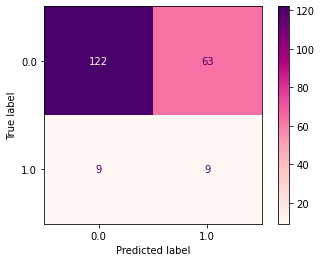

In [182]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_cat_df['outcome'].values, predictions_tree, labels=best_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=best_tree.classes_)
disp.plot(cmap='RdPu')

plt.show()

In [184]:
# Create shap object
explainer = shap.TreeExplainer(best_tree)

# Calculate Shap values
choosen_instance = test_cat_df.drop('outcome',axis=1).values[1:2]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

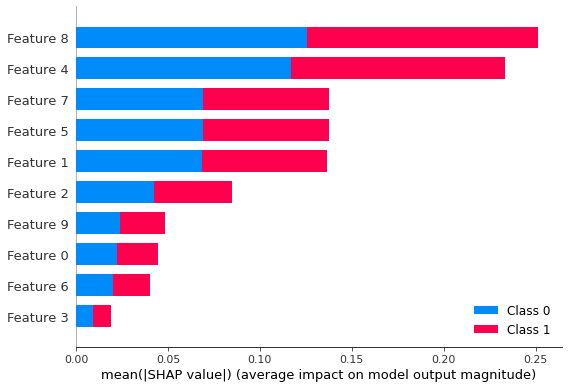

In [187]:
#SHAP feature importance 
shap.summary_plot(shap_values,test_cat_df.drop('outcome',axis=1).values)

#### LIME

In [145]:
ct = cat_df.drop('outcome',axis=1)
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(cat_df.drop('outcome',axis=1).values),
    feature_names=ct.columns,
    class_names=['bad', 'good'],
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=test_cat_df.drop('outcome',axis=1).iloc[2], 
    predict_fn=best_tree.predict_proba
)

exp.show_in_notebook(show_table=True)


In [129]:
# #Create Shap object
# explainer = shap.TreeExplainer(best_tree)
# #Calculate shap values 
# shap_values = explainer.shap_values(test_cat_df.drop('outcome',axis=1).values[1:2])

In [130]:
# print(shap_values[0].shape)
# # shap_values = explainer.shap_values(X_train)

In [131]:
# shap.initjs()
# prediction = best_tree.predict(test_cat_df.drop('outcome',axis=1).values[1:2])[0]
# print(f"The RF predicted: {prediction}")

# #visualizing expected outcome for first row of X_test
# shap.force_plot(explainer.expected_value[1],
#                 shap_values[1],
#                 test_cat_df.drop('outcome',axis=1).values[1], feature_names=X_test.columns) # for values

In [132]:
# y_test.values[1]

In [ ]:
# 
# ## sumaiya random forest
# train,test=train_test_split(cat_df,test_size=0.3,random_state=42,stratify=df['outcome'])

# # Create X_train,Y_train,X_test
# X_train = train.drop(['outcome'], axis=1)
# y_train = train['outcome']

# X_test  = test.drop(['outcome'], axis=1)
# y_test  = test['outcome']
# 

In [ ]:
# test.head(20)

In [ ]:
# #pipeline for random forest
# steps_forest = [('random_forest', RandomForestClassifier())]
# forest_pipeline = Pipeline(steps_forest)

# #params for GridSearchCV
# params = {'random_forest__n_estimators': [25,50,100,150,200,250,300],
#          'random_forest__criterion': ['gini','entropy'],
#          'random_forest__max_features':['sqrt','log2',None]}

# #list(forest_pipeline.get_params().keys())

In [ ]:
# cv = GridSearchCV(forest_pipeline, param_grid = params)
# cv.fit(X_train, y_train)
# predictions_forest = cv.predict(X_test)

In [188]:
# skplt.metrics.plot_confusion_matrix(test_cat_df['outcome'].values, predictions_tree, normalize=False, title = 'Confusion Matrix')

In [ ]:
# #grid search best parameters and score 
# cv.best_params_

In [ ]:
# #grid search best score
# cv.best_score_

In [ ]:
# #create randomforest model with best parameters from gridsearchcv 
# best_forest = RandomForestClassifier(n_estimators = cv.best_params_['random_forest__n_estimators'],criterion = cv.best_params_['random_forest__criterion'], max_features = cv.best_params_['random_forest__max_features'])
# best_forest.fit(X_train, y_train)
# predictions_forest = best_forest.predict(X_test)

In [ ]:
# print('Accuracy Score: ', accuracy_score(y_test, predictions_forest))
# print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_forest))
# print('Classification Report:\n ', classification_report(y_test, predictions_forest))

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_forest, normalize=False, title = 'Confusion Matrix')

In [ ]:
#Create Shap object
explainer = shap.TreeExplainer(best_forest)
#Calculate shap values 
#shap_values = explainer.shap_values(X_test[1:2])

In [ ]:
##
# test.loc[[186]]

In [ ]:
##
# Calculate Shap values
choosen_instance = X_test[1:2]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
#SHAP feature importance 
shap.summary_plot(shap_values,X_test)

#### KNN

In [ ]:
knn_pipeline = make_pipeline(KNeighborsClassifier())

#params for GridSearchCV
param_grid_knn = [{
    'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}]


In [ ]:
knn_cv = GridSearchCV(knn_pipeline, param_grid = param_grid_knn,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  verbose=1,
                  n_jobs=2)

In [ ]:
X_train = train_df[all_features].drop('outcome',axis=1).values
y_train = train_df[all_features]['outcome'].values

In [ ]:
knn_cv.fit(X_train, y_train)
predictions_knn = knn_cv.predict(test_df.drop('outcome',axis=1).values)

In [ ]:
knn_cv.best_params_

In [ ]:
knn_cv.best_score_

In [ ]:
best_grid_knn = knn_cv.best_estimator_
best_grid_knn

In [ ]:
# X = df.drop(['outcome'], axis=1)
# y = df['outcome']
# X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     y, test_size=0.30, 
#                                                     random_state=42)

In [ ]:
# best_grid_knn.fit(X_train, y_train)
# knn_pred2 = best_grid_knn.predict(test_df)

In [ ]:
print('Accuracy Score: ', accuracy_score(test_df['outcome'].values, predictions_knn))
print('Confusion Matrix: \n', confusion_matrix(test_df['outcome'].values, predictions_knn))
print('Classification Report:\n ', classification_report(test_df['outcome'].values, predictions_knn))

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, knn_pred2, normalize=False, title = 'Confusion Matrix')

In [ ]:
df['outcome'].value_counts()

In [ ]:
import researchpy as rp
for i in range(len(cat_df.columns)):
    var, chitest, expected =rp.crosstab(cat_df.iloc[:,-1],cat_df.iloc[:,i], margins = False, test= "chi-square", cramer_correction= True, expected_freqs=True)
    print(var)
    print(chitest)
    print(expected)
    print("-----------------------------------------------------------")